# Exercise 6 : Clusters and Anomalies

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

## Problem 1 : Clustering by Living Area and Sale Price

Extract the required variables from the dataset, and then perform Bi-Variate Clustering.     

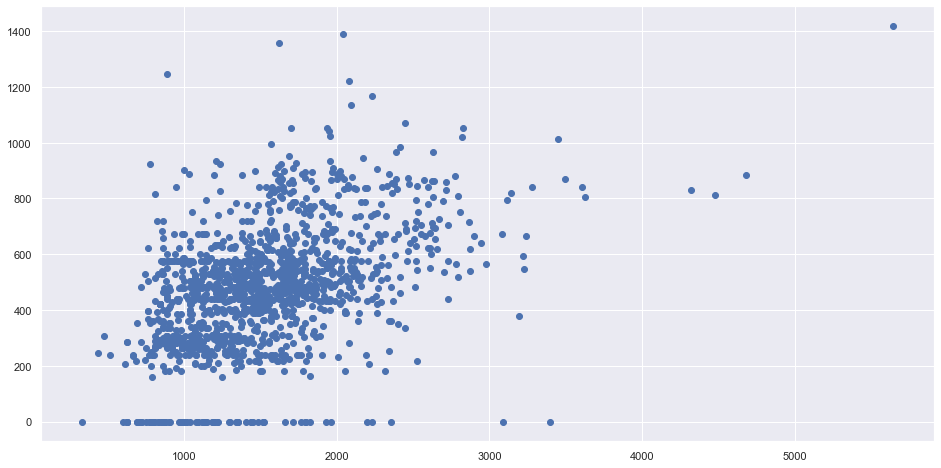

In [3]:
# Extract the Features from the Data
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)                    

#### Basic KMeans Clustering

Guess the number of clusters from the 2D plot, and perform KMeans Clustering.    
We will use the `KMeans` clustering model from `sklearn.cluster` module.

In [4]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

Print the Cluster Centers as Co-ordinates of Features

In [5]:
# Print the Cluster Centers
print("Features", "\tLiving", "\tGarage")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	Living 	Garage

Cluster 0:	1691.27	523.9	
Cluster 1:	1085.01	374.29	
Cluster 2:	2557.54	668.91	


#### Labeling the Clusters in the Data

We may use the model on the data to `predict` the clusters.

/Users/thinh_pham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

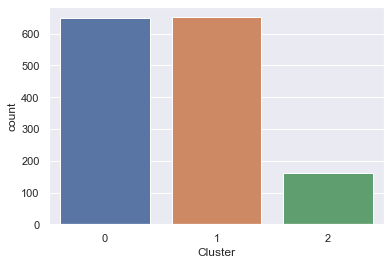

In [6]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

(68.59999999999997, 5907.4, -70.9, 1488.9)

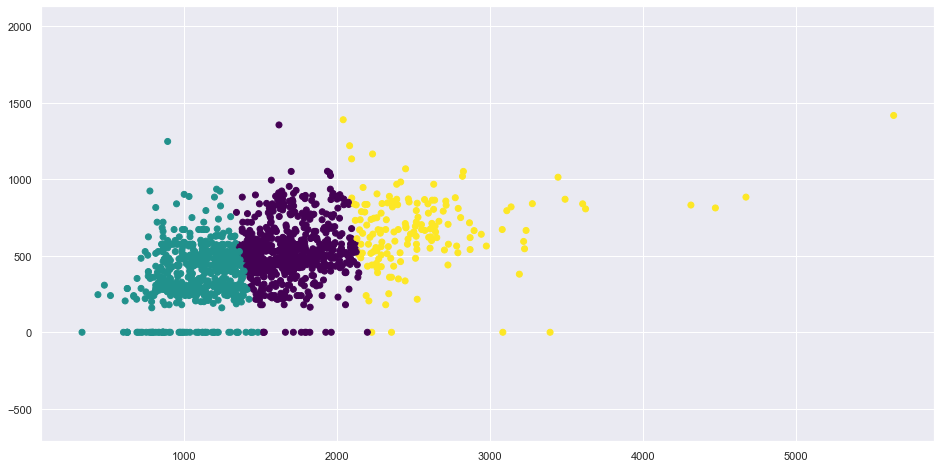

In [7]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)
plt.axis('equal')

/Users/thinh_pham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


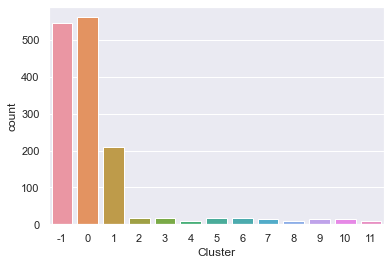

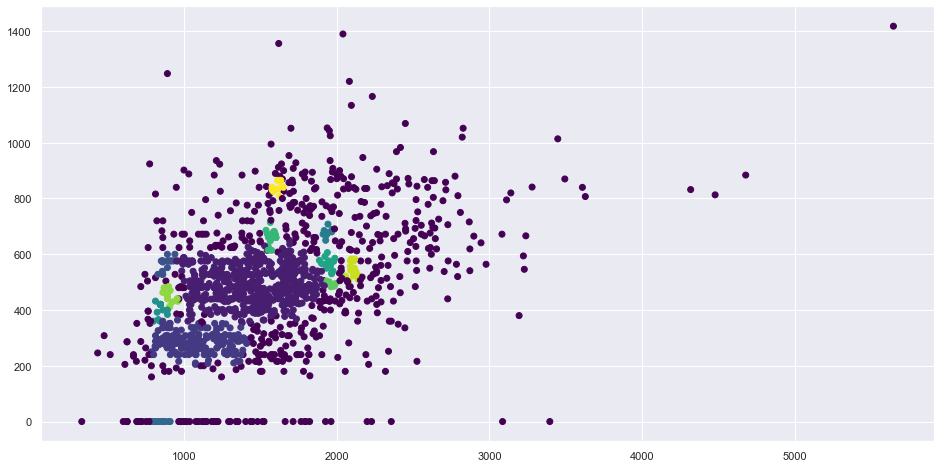

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=40, min_samples=10).fit(X)

# Predict the Cluster Labels
labels = clustering.labels_

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)



#### Within Cluster Sum of Squares

WithinSS = 0 : Every data point is a cluster on its own    
WithinSS = Variance : Whole dataset is a single cluster

In [9]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 140811670.48311228


**Discuss** : Is this the *optimal* clustering that you will be happy with? If not, try changing `num_clust`.

---

## Anomaly Detection for the Dataset

Extract the required variables from the dataset, and then perform Bi-Variate Anomaly Detection.     

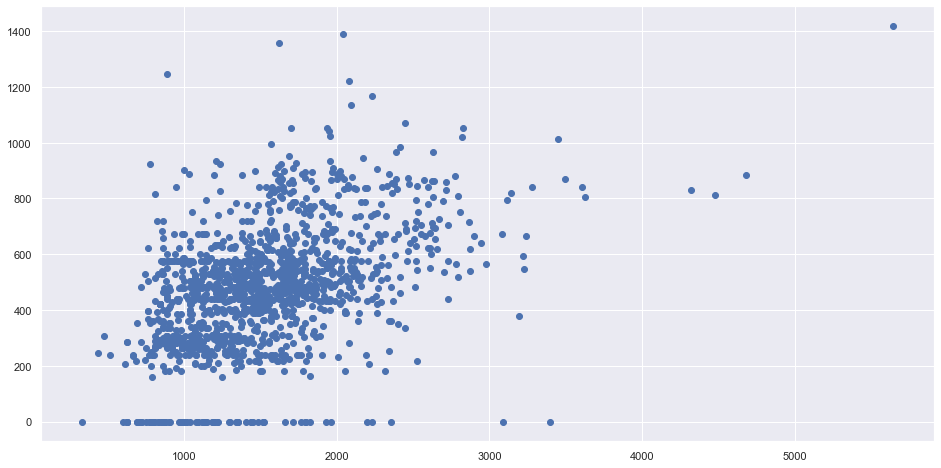

In [10]:
# Extract the Features from the Data
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
                           
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)                    

#### Basic Anomaly Detection

Use the Nearest Neighbors (k-NN) pattern-identification method for detecting Outliers and Anomalies.    
We will use the `LocalOutlierFactor` neighborhood model from `sklearn.neighbors` module.

In [11]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 10      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05, n_neighbors=10)

#### Labeling the Anomalies in the Data

We may use the model on the data to `predict` the anomalies.

/Users/thinh_pham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

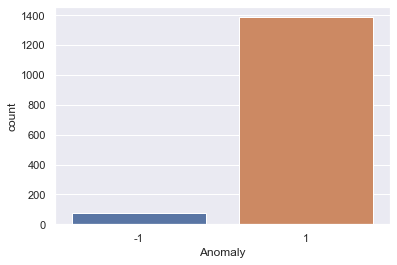

In [12]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

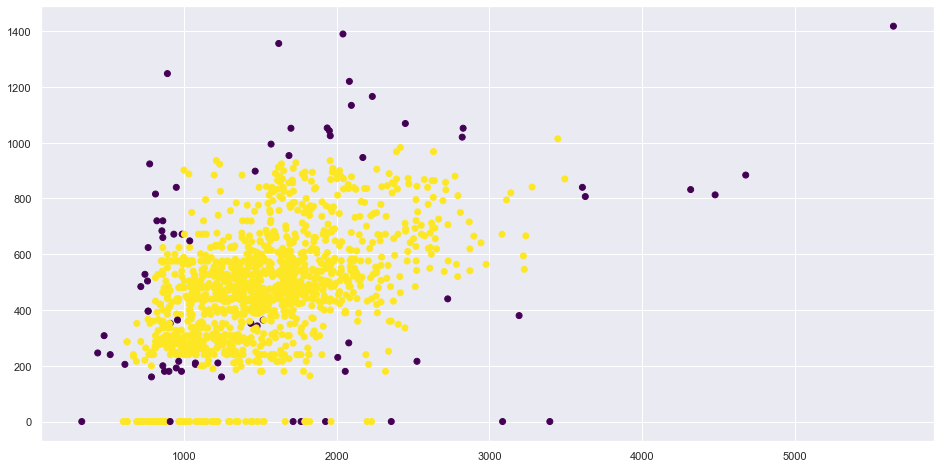

In [13]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

**Discuss** : Is this the *optimal* anomaly detection that you will be happy with? If not, try changing parameters.